USING XGBOOST ML MODEL

        date  temperature    rainfall  past_demand      demand
0 2020-01-01    19.363503  162.914944    65.988955   51.494269
1 2020-01-02    33.767858  133.039444   148.676796  150.928837
2 2020-01-03    28.299849  104.613085   199.912059  174.338881
3 2020-01-04    24.966462   71.766097    57.231806   23.076938
4 2020-01-05    13.900466  175.440108   196.576128  198.688554
Mean Absolute Error (MAE): 14.516132872605223
Mean Squared Error (MSE): 315.03601854103823
Root Mean Squared Error (RMSE): 17.749254027734185
Weighted Mean Absolute Error (WMAE): 14.420485403169385


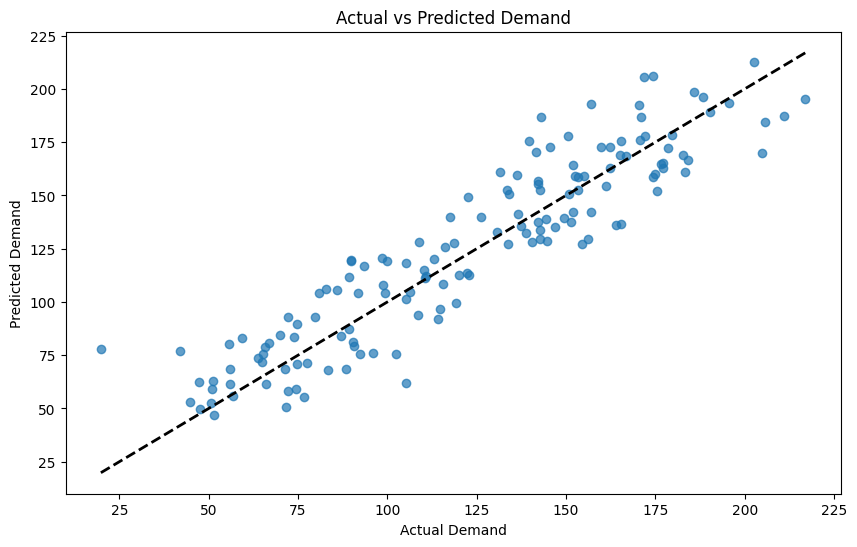

In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a date range
dates = pd.date_range(start='2020-01-01', end='2021-12-31')

# Generate synthetic data
temperature = np.random.uniform(low=10, high=35, size=len(dates))
rainfall = np.random.uniform(low=0, high=200, size=len(dates))
past_demand = np.random.uniform(low=50, high=200, size=len(dates))
demand = past_demand + np.random.normal(loc=0, scale=15, size=len(dates))

# Create a DataFrame
data = pd.DataFrame({
    'date': dates,
    'temperature': temperature,
    'rainfall': rainfall,
    'past_demand': past_demand,
    'demand': demand
})

# Display the first few rows of the dataset
print(data.head())

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract useful time-based features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

# Drop the original 'date' column
data.drop('date', axis=1, inplace=True)

# Define features and target
X = data.drop('demand', axis=1)
y = data['demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgboost_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Calculate errors using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Weighted Mean Absolute Error (WMAE)
weights = np.random.uniform(low=0.5, high=2.0, size=len(y_test))  # Example weights
wmae = np.sum(weights * np.abs(y_test - y_pred)) / np.sum(weights)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Weighted Mean Absolute Error (WMAE): {wmae}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


In [15]:
data.head()

,temperature,rainfall,past_demand,demand,year,month,day,day_of_week,rolling_mean_demand
58,11.130682,189.456668,59.040109,44.557639,2020,2,28,4,126.358066
59,18.133258,30.670281,190.165404,190.617828,2020,2,29,5,129.611044
60,19.716932,117.245966,102.743403,98.894584,2020,3,1,6,129.890359
61,16.783726,101.177736,65.213124,29.171815,2020,3,2,0,128.380539
62,30.718438,122.290847,122.880764,129.244278,2020,3,3,1,127.553537


USING ROLLING-MEAN

    temperature    rainfall  past_demand      demand  year  month  day  \
58    11.130682  189.456668    59.040109   44.557639  2020      2   28   
59    18.133258   30.670281   190.165404  190.617828  2020      2   29   
60    19.716932  117.245966   102.743403   98.894584  2020      3    1   
61    16.783726  101.177736    65.213124   29.171815  2020      3    2   
62    30.718438  122.290847   122.880764  129.244278  2020      3    3   

    day_of_week  rolling_mean_demand  
58            4                  NaN  
59            5                  NaN  
60            6                  NaN  
61            0                  NaN  
62            1                  NaN  
Mean Absolute Error (MAE): 36.00119328700291
Mean Squared Error (MSE): 1824.0823927383121
Root Mean Squared Error (RMSE): 42.70927759560342
Weighted Mean Absolute Error (WMAE): 36.47731122192966


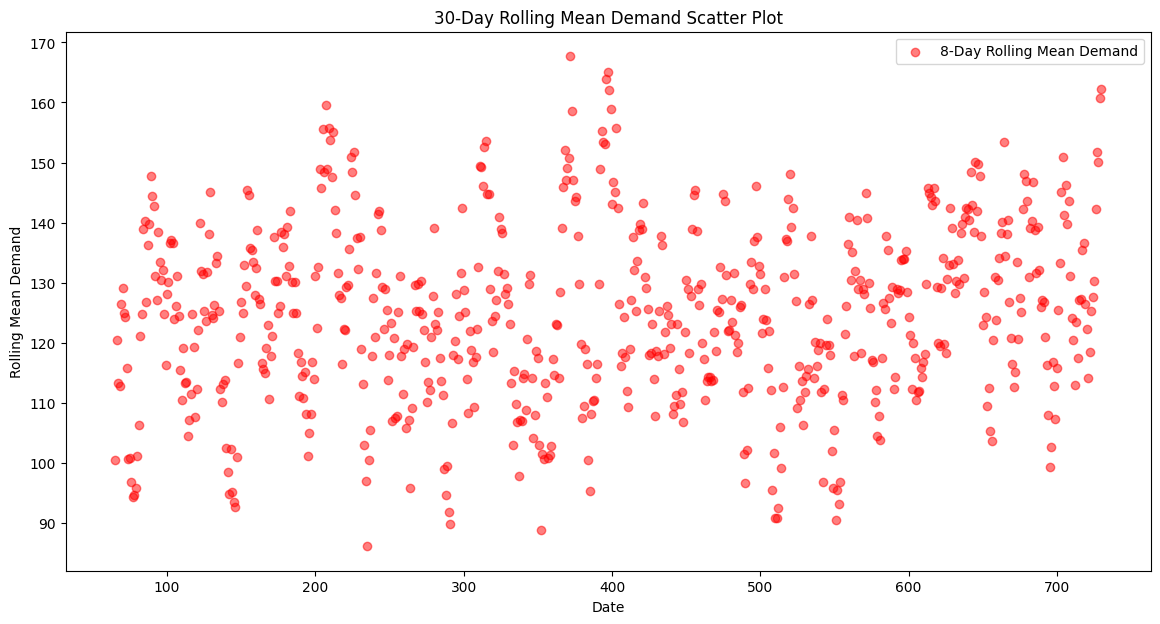

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming data DataFrame is already created and looks like this:
# data = pd.DataFrame({
#     'date': dates,
#     'temperature': temperature,
#     'rainfall': rainfall,
#     'past_demand': past_demand,
#     'demand': demand
# })

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())

# Set 'date' as the index if not already set
if 'date' in data.columns:
    data.set_index('date', inplace=True)

# Calculate the rolling mean with a window of 30 days
data['rolling_mean_demand'] = data['demand'].rolling(window=8).mean()

# Drop NaN values
data.dropna(subset=['rolling_mean_demand'], inplace=True)

# Calculate metrics
mae = mean_absolute_error(data['demand'], data['rolling_mean_demand'])
mse = mean_squared_error(data['demand'], data['rolling_mean_demand'])
rmse = np.sqrt(mse)

# Weighted Mean Absolute Error (WMAE)
weights = np.random.uniform(low=0.5, high=2.0, size=len(data['demand']))  # Example weights
wmae = np.sum(weights * np.abs(data['demand'] - data['rolling_mean_demand'])) / np.sum(weights)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Weighted Mean Absolute Error (WMAE): {wmae}")

# Create a scatter plot for the rolling mean
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['rolling_mean_demand'], label='8-Day Rolling Mean Demand', color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Rolling Mean Demand')
plt.title('30-Day Rolling Mean Demand Scatter Plot')
plt.legend()
plt.show()


    temperature    rainfall  past_demand      demand  year  month  day  \
58    11.130682  189.456668    59.040109   44.557639  2020      2   28   
59    18.133258   30.670281   190.165404  190.617828  2020      2   29   
60    19.716932  117.245966   102.743403   98.894584  2020      3    1   
61    16.783726  101.177736    65.213124   29.171815  2020      3    2   
62    30.718438  122.290847   122.880764  129.244278  2020      3    3   

    day_of_week  rolling_mean_demand  
58            4                  NaN  
59            5                  NaN  
60            6                  NaN  
61            0                  NaN  
62            1                  NaN  


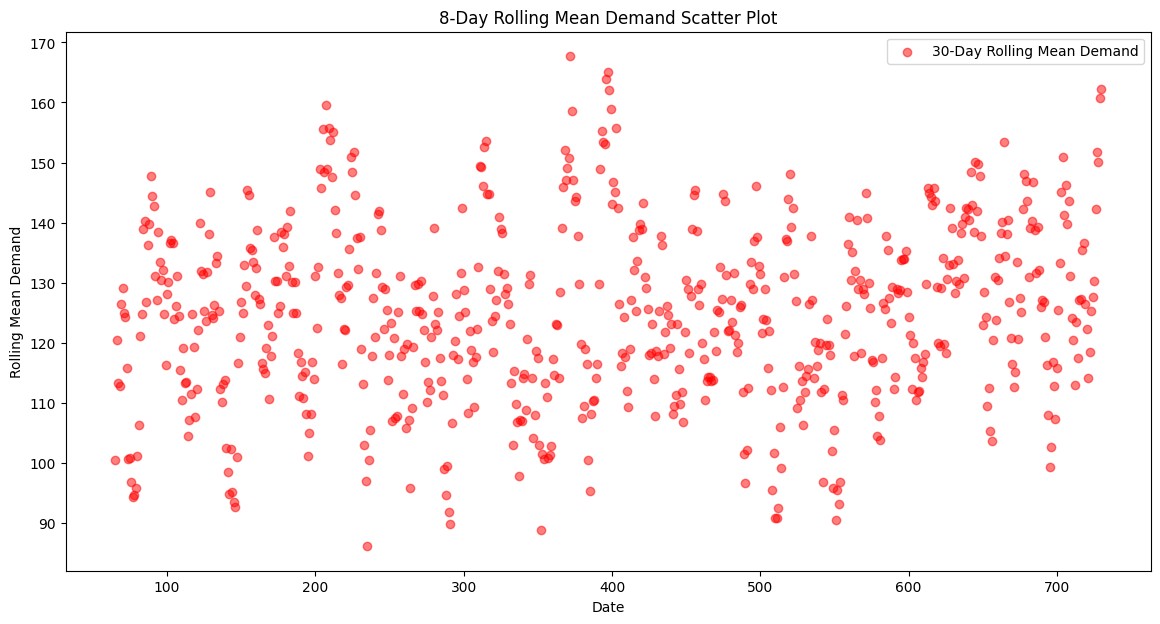

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming data DataFrame is already created and looks like this:
# data = pd.DataFrame({
#     'date': dates,
#     'temperature': temperature,
#     'rainfall': rainfall,
#     'past_demand': past_demand,
#     'demand': demand
# })

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())

# Set 'date' as the index if not already set
if 'date' in data.columns:
    data.set_index('date', inplace=True)

# Calculate the rolling mean with a window of 30 days
data['rolling_mean_demand'] = data['demand'].rolling(window=8).mean()

# Create a scatter plot for the rolling mean
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['rolling_mean_demand'], label='30-Day Rolling Mean Demand', color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Rolling Mean Demand')
plt.title('8-Day Rolling Mean Demand Scatter Plot')
plt.legend()
plt.show()
